# ST590 Project3-Group16
### Student: Autumn Biggie and YiHua Lin


## Introduction: 

The S&P 500 is a capitalization-weighted index of the top 500 publicly traded companies in the United States (top 500 meaning the companies with the largest market cap). The S&P 500 index is a useful index to study because it generally reflects the health of the overall U.S. stock market.

We are going to use S&P 500 Financial Dataset to predict price, which will give us a typical value for a stock price from a company with a given set of metrics, or predictor variables.  

This type of investigation falls into the category of supervised learning, where we are trying to gain information about the factors that affect a particular variable in question. Here, that variable is `Price`. Using Exploratory Data Analysis and model fitting, we will examine the distribution of `Price`, its relationship with other variables in the data set, and we'll use various models to predict `Price` using the other variables (or transformations of them).  

## Predictor Introduction( 4 character variables and 10 numeric variables): 

character variables:

**Symbol-** Ticker symbol used to uniquely identify each company on a particular stock market

**Name-** Legal name of the company

**Sector-** An area of the economy where businesses share a related product or service

**SEC Filings-** Helpful documents relating to a company

numeric variables:

**Price/Earnings(P/E)-** financial indicator equal to the ratio of the market value of a share to the annual earnings per share

**Dividend yield-** the ratio of the annual dividend per share to the share price. This value is most often expressed as a percentage.

**Earnings/Share(EPS) -** financial indicator equal to the ratio of the company's net profit available for distribution to the average annual number of ordinary shares.

**EBITDA-** an analytical indicator equal to the amount of profit before deduction of expenses on payment of interest, taxes, depreciation and amortization.Often used as a proxy for its profitability

**Price/Sales(P/S)-** financial indicator equal to the ratio of a company's market capitalization to its annual revenue.

**Price/book(P/B)-** financial ratio equal to the ratio of the company's current market capitalization to its book value.

**Price-** Price per share of the company

**52 week high-** The annual high of a company’s share price

**52 week low-** The annual low of a company’s share price
        - 
        
**Market Cap-** The market value of a company’s shares (calculated as share price x number of shares)


## Exploratory Data Analysis  

In the first section of this document, we'll perform EDA on the data. Specifically, we will only work with the training data during this portion, and explore trends using numerical summaries and plots. The response variable in questions is `Price`, so this will be the focus of our EDA.  

### Import appropriate modules for starting spark session, using pandas on spark, and accessing math functions

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats
import sqlite3
import pylab as pl
#import plotly
import pyspark.pandas as ps
#import plotly.graph_objs as go
import seaborn as sns
import sys
import os
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
#from plotly.offline import init_notebook_mode, iplot
from pyspark.sql import SparkSession
from pyspark.sql import functions as func
from pyspark.sql.functions import isnan, when, count, col, sqrt
spark = SparkSession.builder.master('local[*]').getOrCreate()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from pyspark.ml.feature import SQLTransformer
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.mllib.regression import LabeledPoint
from pyspark.ml.regression import LinearRegression
from pyspark.mllib.tree import RandomForest
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import DecisionTreeRegressor

### Data Split and Cleaning    

First we need to read in the `financials.csv` data set from Kaggle.com. The first 5 observations are displayed below. 

In [2]:
# Read in S&P 500 data set using pandas
financials = pd.read_csv("financials.csv") 
financials.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


We create dummy variables for each category in the variable `Sector` for ease of use when modeling.  The resulting data set is shown below.  

In [3]:
# Create Dummy variable for Sector
financialsj=pd.get_dummies(financials["Sector"])
#join dummy dataframe to pandas dataframe
financials=financials.join(financialsj)
financials.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,...,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,...,0,0,0,0,1,0,0,0,0,0
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,...,0,0,0,0,1,0,0,0,0,0
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,...,0,0,0,1,0,0,0,0,0,0
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,...,0,0,0,1,0,0,0,0,0,0
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,...,0,0,0,0,0,1,0,0,0,0


Now we convert the pandas data frame `financials` to a `spark` data frame called `findata`.  

In [5]:
findata = spark.createDataFrame(financials) #convert to spark data frame
findata.show(5)

+------+-------------------+--------------------+------+--------------+--------------+--------------+-----------+------------+---------------+----------+-----------+----------+--------------------+----------------------+----------------+------+----------+-----------+-----------+----------------------+---------+-----------+--------------------------+---------+
|Symbol|               Name|              Sector| Price|Price/Earnings|Dividend Yield|Earnings/Share|52 Week Low|52 Week High|     Market Cap|    EBITDA|Price/Sales|Price/Book|         SEC Filings|Consumer Discretionary|Consumer Staples|Energy|Financials|Health Care|Industrials|Information Technology|Materials|Real Estate|Telecommunication Services|Utilities|
+------+-------------------+--------------------+------+--------------+--------------+--------------+-----------+------------+---------------+----------+-----------+----------+--------------------+----------------------+----------------+------+----------+-----------+---------

Before we perform any Exploratory Data Analysis (EDA), we need to split the data set and only work with the training data. This will ensure we are exploring the data and building models without looking at the test data. Hopefully, this will ultimately help us produce a model that performs well on new data, not just the data we currently have access to.  

The following code splits the data into two spark data frames, `train` and `test`.  

In [6]:
#split pandas dataframe then transfer train and test set to spark
# Create training and test set with 80%/20% split, returning #obs in each set
# We will use THESE sets during modeling
train, test = findata.randomSplit([0.8, 0.2], seed = 3)
print(train.count(), test.count())

398 107


There are 398 observations in the training set and 107 observations in the test set. Now let's check out the schema of the train data set so we can determine which variables to explore.

In [7]:
# check the columns ( pysqldataframe)
train.printSchema()
train.describe()

root
 |-- Symbol: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Price/Earnings: double (nullable = true)
 |-- Dividend Yield: double (nullable = true)
 |-- Earnings/Share: double (nullable = true)
 |-- 52 Week Low: double (nullable = true)
 |-- 52 Week High: double (nullable = true)
 |-- Market Cap: double (nullable = true)
 |-- EBITDA: double (nullable = true)
 |-- Price/Sales: double (nullable = true)
 |-- Price/Book: double (nullable = true)
 |-- SEC Filings: string (nullable = true)
 |-- Consumer Discretionary: long (nullable = true)
 |-- Consumer Staples: long (nullable = true)
 |-- Energy: long (nullable = true)
 |-- Financials: long (nullable = true)
 |-- Health Care: long (nullable = true)
 |-- Industrials: long (nullable = true)
 |-- Information Technology: long (nullable = true)
 |-- Materials: long (nullable = true)
 |-- Real Estate: long (nullable = true)
 |-- Telecommunication Se

DataFrame[summary: string, Symbol: string, Name: string, Sector: string, Price: string, Price/Earnings: string, Dividend Yield: string, Earnings/Share: string, 52 Week Low: string, 52 Week High: string, Market Cap: string, EBITDA: string, Price/Sales: string, Price/Book: string, SEC Filings: string, Consumer Discretionary: string, Consumer Staples: string, Energy: string, Financials: string, Health Care: string, Industrials: string, Information Technology: string, Materials: string, Real Estate: string, Telecommunication Services: string, Utilities: string]

We need to check for any missing values that could cause problems during our analysis, then remove them from the data.  

In [8]:
#checking for null values( pysqldataframe)
train.select([count(when(isnan(c), c)).alias(c) for c in train.columns]).show()
# Price/Earnings has 2 and Price/Book has 7

+------+----+------+-----+--------------+--------------+--------------+-----------+------------+----------+------+-----------+----------+-----------+----------------------+----------------+------+----------+-----------+-----------+----------------------+---------+-----------+--------------------------+---------+
|Symbol|Name|Sector|Price|Price/Earnings|Dividend Yield|Earnings/Share|52 Week Low|52 Week High|Market Cap|EBITDA|Price/Sales|Price/Book|SEC Filings|Consumer Discretionary|Consumer Staples|Energy|Financials|Health Care|Industrials|Information Technology|Materials|Real Estate|Telecommunication Services|Utilities|
+------+----+------+-----+--------------+--------------+--------------+-----------+------------+----------+------+-----------+----------+-----------+----------------------+----------------+------+----------+-----------+-----------+----------------------+---------+-----------+--------------------------+---------+
|     0|   0|     0|    0|             2|             0|  

In [9]:
#remove the missing data

train=train.na.drop()
test=test.na.drop()

In addition, there are special characters such as slashes and spaces that could also cause problems, so we'll replace all of them with underscores.  

In [10]:
#change the column name for train set and test set for easier EDA
train = train.select([func.col(col).alias(col.replace('/', '_')) for col in train.columns])
train = train.select([func.col(col).alias(col.replace(' ', '_')) for col in train.columns])
test = test.select([func.col(col).alias(col.replace('/', '_')) for col in test.columns])
test = test.select([func.col(col).alias(col.replace(' ', '_')) for col in test.columns])


In [11]:
#summary for numeric variables
train.select(train.columns[1:10]).summary().to_pandas_on_spark()

,summary,Name,Sector,Price,Price_Earnings,Dividend_Yield,Earnings_Share,52_Week_Low,52_Week_High,Market_Cap
0,count,389,389,389,389,389,389,389,389,389
1,mean,None,None,102.57997429305912,23.854832904884322,1.8498367506966582,3.6892544987146523,121.22018920308483,82.8720673084833,4.665931922568381E10
2,stddev,None,None,127.3932017265182,31.122985096630753,1.5477669844389308,5.389155367663475,148.23370050727502,105.268434546365,8.340921724433597E10
3,min,3M Company,Consumer Discretionary,2.82,-251.53,0.0,-24.62,6.59,2.8,2.626102121E9
4,25%,None,None,46.25,15.41,0.76878726,1.55,57.73,38.14,1.2466660892E10
5,50%,None,None,74.51,19.57,1.6813145,2.94,88.0,63.41,2.1101697598E10
6,75%,None,None,116.54,25.9,2.6699784,5.1,139.24,96.66,4.355665E10
7,max,Zions Bancorp,Utilities,1806.06,305.56,12.661196,44.09,2067.99,1589.0,8.09508E11


Finally, we'll take a quick look at the categorical variable. Below, we've generated a table of counts for each level of `Sector`. It appears the most common sectors are Consumer Discretionary, Information Technology, Financials, and Industrials.  

In [12]:
#summary for categorical variables

train.groupBy('Sector').count().select(func.col("Sector"),func.col("count")).show()
pie1=train.groupBy('Sector').count().select(func.col("Sector"),func.col("count"))

+--------------------+-----+
|              Sector|count|
+--------------------+-----+
|         Health Care|   45|
|              Energy|   23|
|Information Techn...|   50|
|Telecommunication...|    2|
|         Real Estate|   27|
|           Materials|   21|
|Consumer Discreti...|   67|
|           Utilities|   21|
|    Consumer Staples|   28|
|         Industrials|   55|
|          Financials|   50|
+--------------------+-----+



### Outlier Removal and Generating Plots and Summaries  

Now we'll create tables, numeric summaries, and graphs to explore the data, with a focus on the `Price` variable. This is the variable we'll use as our response when we create the models. The pandas-on-spark versions of the data frames are called `fintrain` and `fintest`.  

The numeric variables are described below using common metrics to get an idea of their distribution, as well as what constitutes a "typical" value for each variable.  

In [13]:
# Convert training set above to pandas-on-spark data set 
fintrain = train.to_pandas_on_spark()
fintest = test.to_pandas_on_spark()

# Describe numeric variables in data set and see the data dristribution
fintrain.describe()

,Price,Price_Earnings,Dividend_Yield,Earnings_Share,52_Week_Low,52_Week_High,Market_Cap,EBITDA,Price_Sales,Price_Book,Consumer_Discretionary,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Telecommunication_Services,Utilities
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.890000e+02,3.890000e+02,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,102.579974,23.854833,1.849837,3.689254,121.220189,82.872067,4.665932e+10,3.490411e+09,3.913002,11.659871,0.172237,0.071979,0.059126,0.128535,0.115681,0.141388,0.128535,0.053985,0.069409,0.005141,0.053985
std,127.393202,31.122985,1.547767,5.389155,148.233701,105.268435,8.340922e+10,6.938302e+09,3.473636,70.121585,0.378072,0.258787,0.236164,0.335115,0.320254,0.348870,0.335115,0.226278,0.254475,0.071611,0.226278
min,2.820000,-251.530000,0.000000,-24.620000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.173970,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.250000,15.410000,0.768787,1.550000,57.730000,38.140000,1.246666e+10,7.367980e+08,1.614736,2.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.510000,19.570000,1.681315,2.940000,88.000000,63.410000,2.110170e+10,1.560000e+09,2.814778,3.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,116.540000,25.900000,2.669978,5.100000,139.240000,96.660000,4.355665e+10,3.236000e+09,4.703259,6.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1806.060000,305.560000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1318.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


First we want to examine the distribution of `Price` to observe the shape, center, spread, etc. The distribution appears to be right skewed with a heavy tail. The vast majority of the data is within the interval [0,200].  

C:\Users\autum\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


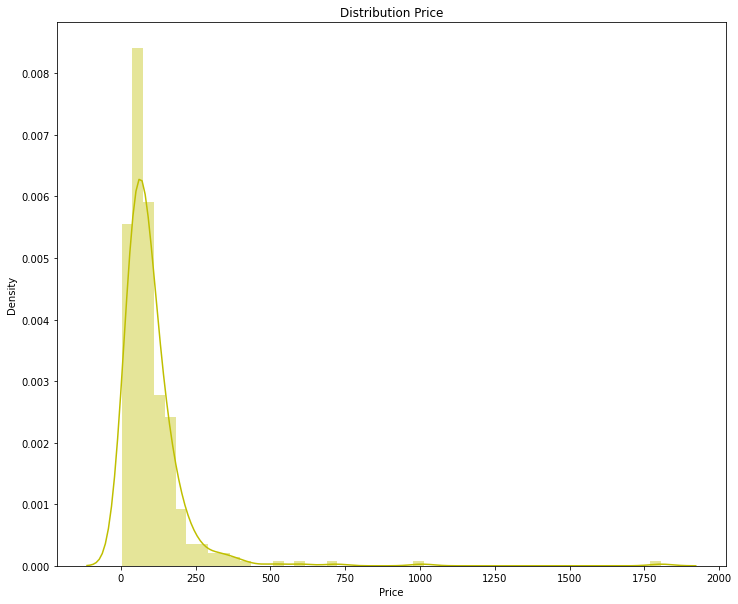

In [14]:
#check the distribution of price
train_pd=train.toPandas()
pl.figure(figsize=(12,10))
pl.title("Distribution Price")
ax = sns.distplot(train_pd["Price"], color = 'y')# no negative number

The boxplot below shows the spread of the values of `Price` for each sector. However, the presence of outliers makes the plot difficult to read. Let's filter the `Price` to include only values less than 400.   

<AxesSubplot:xlabel='Sector', ylabel='Price'>

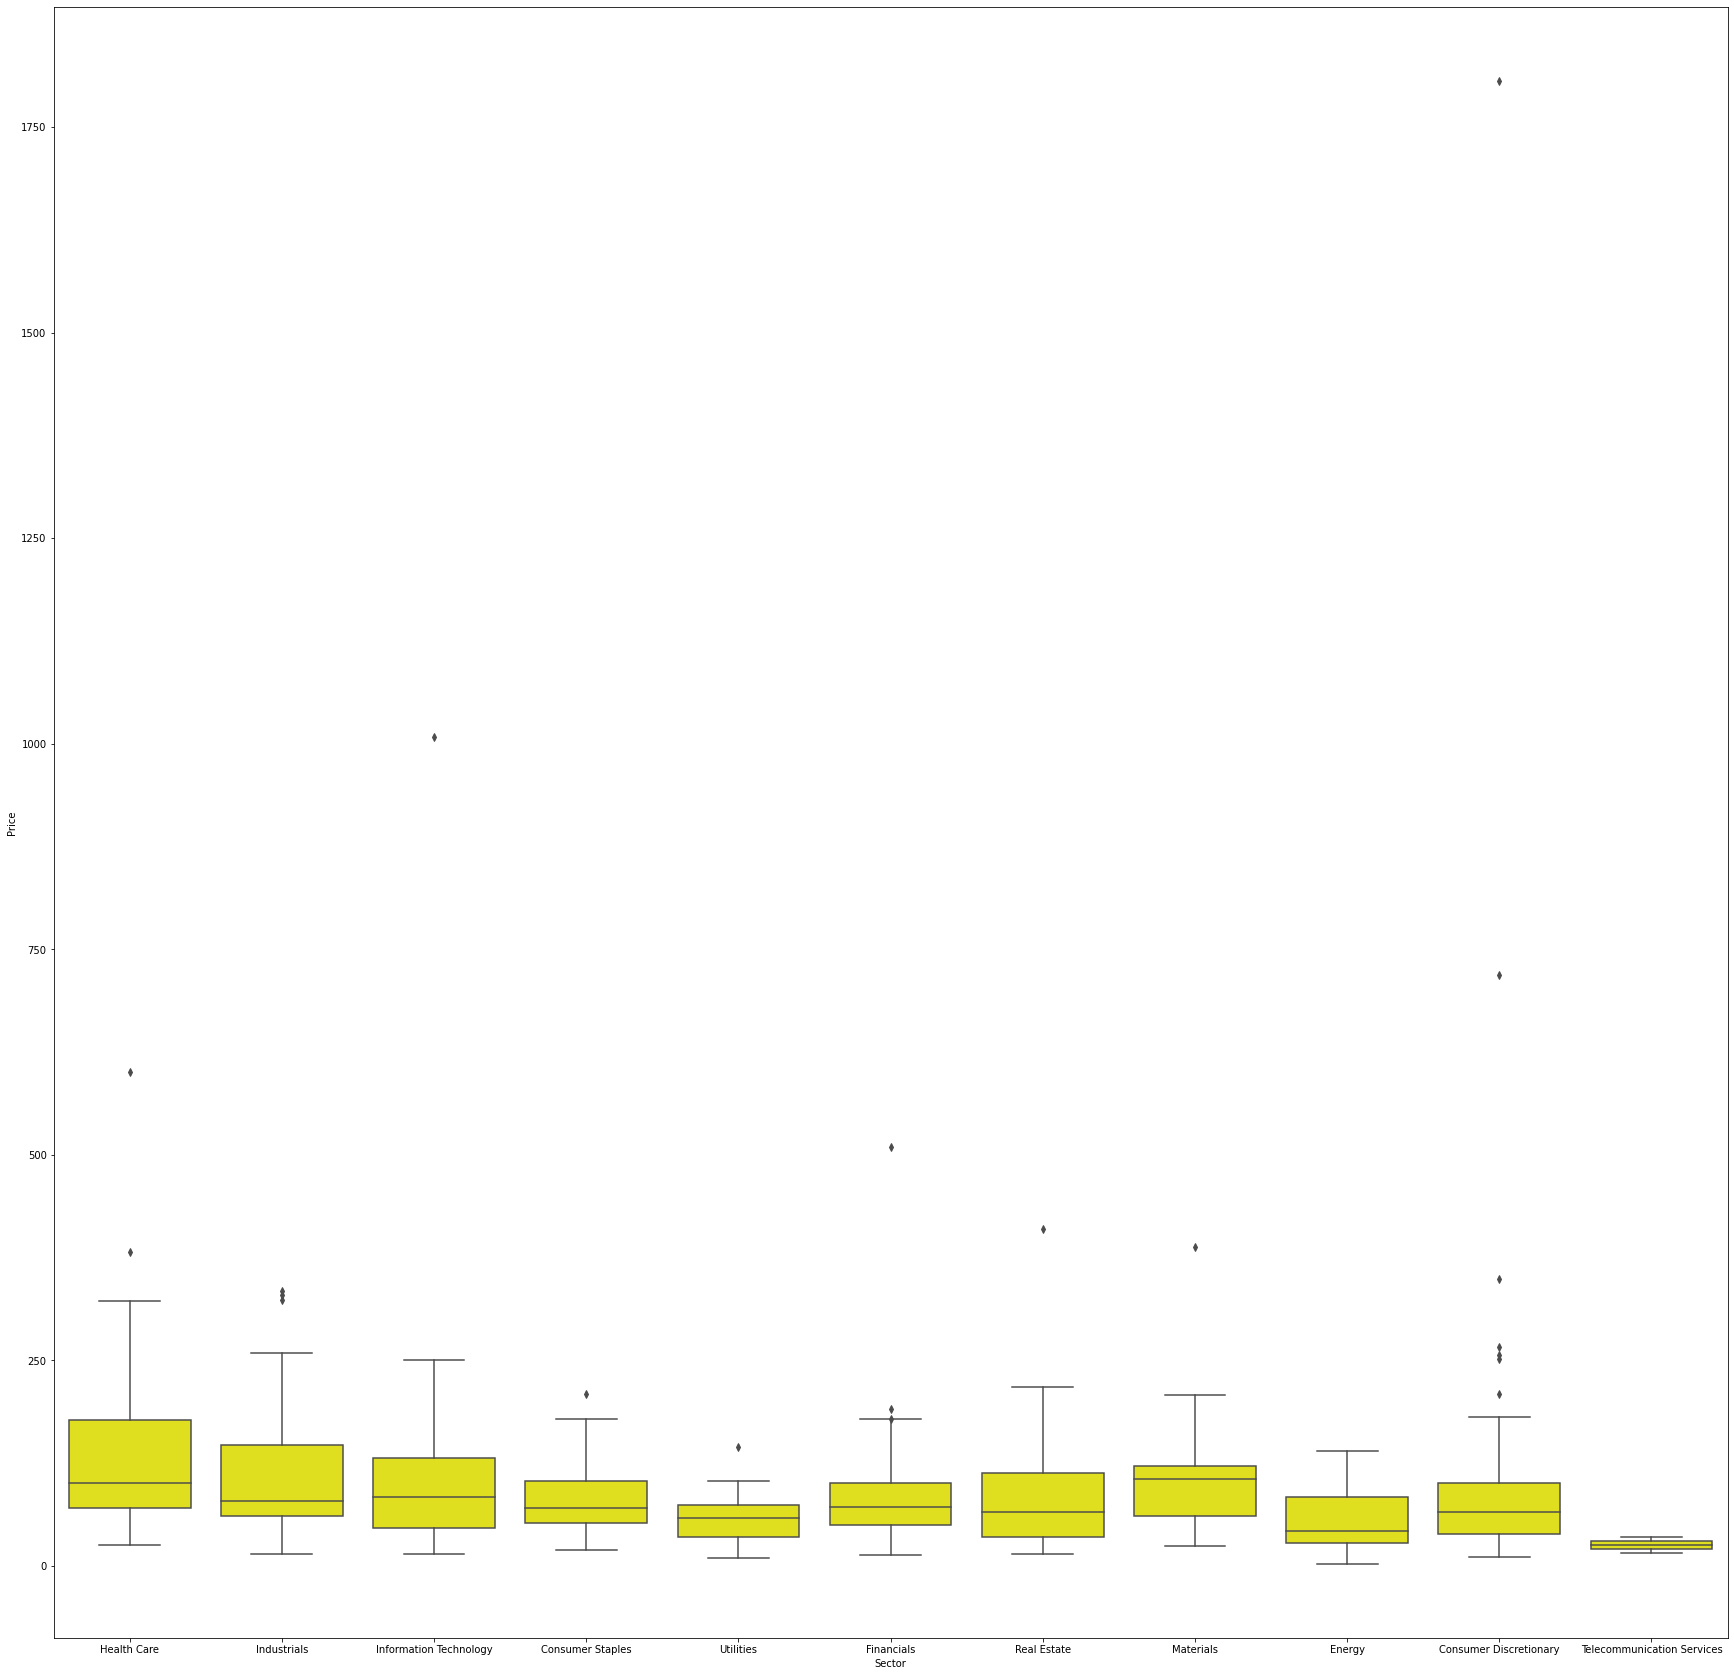

In [15]:
# Check Boxplot and see the price distribution by sectors
fig, ax = plt.subplots(1, 1, figsize=(30,30))
sns.boxplot(x='Sector',y='Price',data=train.toPandas(),color='yellow')

The boxplot below shows the spread of the values of `Price` for each sector. It appears that the health care sector has the greatest variance and telecommunication services has the least variance. The materials sector has the highest median and the highest value for `Price` in the data set.  

In [16]:
train=train.filter(train.Price<400)

<AxesSubplot:xlabel='Sector', ylabel='Price'>

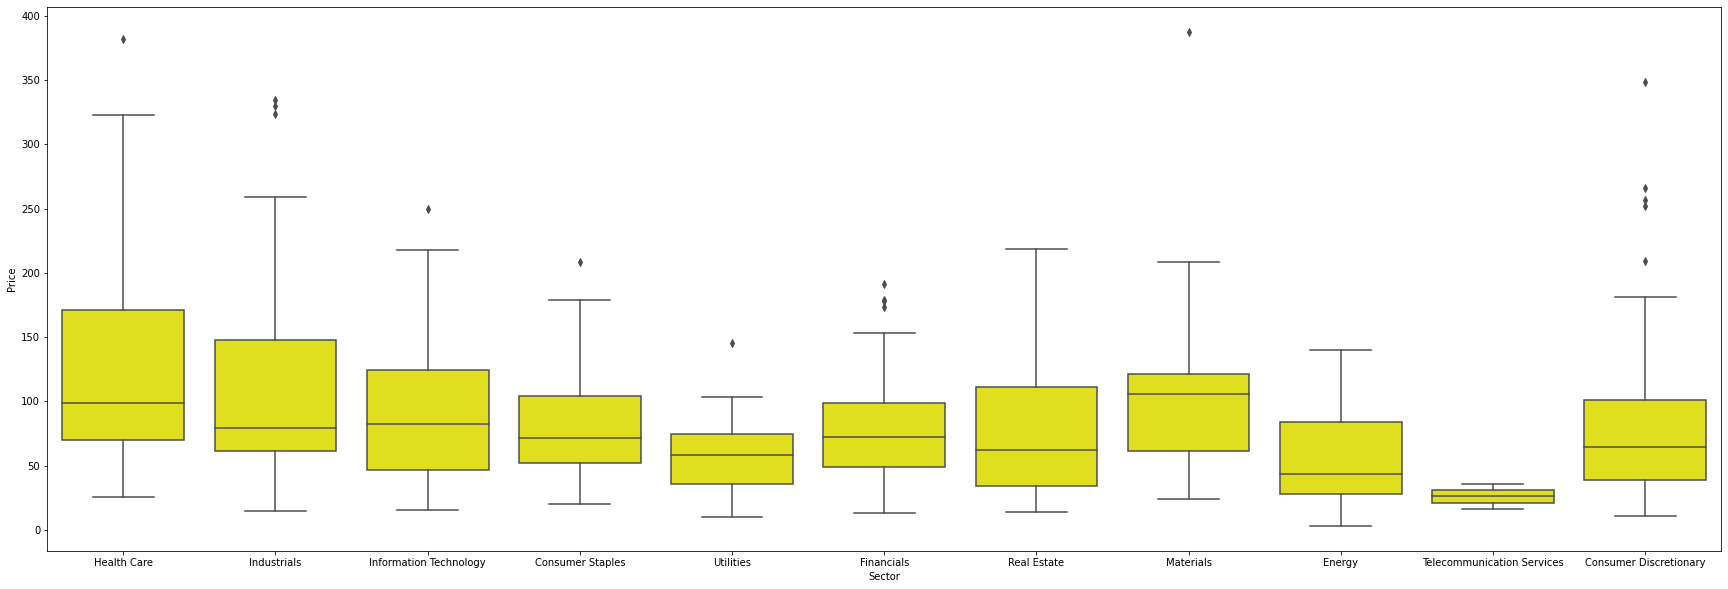

In [17]:
# boxplot of price ( after remove outliers)
fig, ax = plt.subplots(1, 1, figsize=(30,10))
sns.boxplot(x='Sector',y='Price',data=train.toPandas(),color='yellow')

We can also view the mean for each numeric variable grouped by `Sector`, which shows how the sectors differ based on metric.  

In [18]:
# View mean Price, Price/Earnings, Earnings/Share, and EBITDA for each sector
findata.groupBy('Sector').avg().to_pandas_on_spark()

,Sector,avg(Price),avg(Price/Earnings),avg(Dividend Yield),avg(Earnings/Share),avg(52 Week Low),avg(52 Week High),avg(Market Cap),avg(EBITDA),avg(Price/Sales),avg(Price/Book),avg(Consumer Discretionary),avg(Consumer Staples),avg(Energy),avg(Financials),avg(Health Care),avg(Industrials),avg(Information Technology),avg(Materials),avg(Real Estate),avg(Telecommunication Services),avg(Utilities)
0,Health Care,132.515738,NaN,0.917243,4.340492,160.758534,103.719253,5.318622e+10,3.657468e+09,4.827239,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Energy,57.887500,38.559063,2.014452,-1.648438,72.589687,48.141234,4.241607e+10,4.438905e+09,3.689595,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Information Technology,119.242857,37.179857,1.228494,3.110000,138.778641,91.891416,9.610175e+10,6.161996e+09,5.880142,10.873571,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Telecommunication Services,33.603333,11.190000,7.567797,4.426667,41.693333,29.503667,1.510141e+11,3.365833e+10,1.511056,3.716667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Real Estate,88.712727,22.459091,3.894758,2.391212,110.550455,82.878088,1.894896e+10,1.384265e+09,9.962681,6.004848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,Materials,102.386800,20.542400,1.737976,4.932000,118.038852,85.583248,2.769200e+10,2.284348e+09,2.876093,4.788800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,Consumer Discretionary,124.034524,NaN,1.572412,4.879048,146.931427,96.092364,3.825670e+10,3.501797e+09,2.275769,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Utilities,55.194643,16.846429,3.759224,2.014643,68.497321,52.802321,2.184402e+10,3.485105e+09,2.561081,2.106786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Consumer Staples,79.764118,21.963235,2.433391,3.659412,92.832285,68.929441,6.138459e+10,5.291986e+09,2.869688,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Industrials,116.887612,21.494328,1.479392,5.344030,134.579476,90.837024,3.599313e+10,3.063030e+09,2.573401,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Now, we want to examine `EBITDA` as it relates to `Sector` and `Price`, since `EBITDA` is often used as a proxy to determine the profitability of a company. First, we'll create a categorical version of the `Price` variable with levels low, medium, and high. The new data set with the `Price_cat` variable is outputted below.  

In [19]:
# Create categorical version of Price variable with levels "Low" "Medium" and "High" based on quantiles above

from pyspark.sql.functions import udf
from pyspark.sql.types import *
from pyspark.sql.functions import *

def categorizer(price):
    if price < 46.25:
        return "Low"
    elif price < 116.54:
        return "Mid"
    else:
        return "High"
    
pricecat_udf = udf(categorizer, StringType())
fintrain = train.withColumn("Price_cat", pricecat_udf("Price")).to_pandas_on_spark()
fintrain.head()

,Symbol,Name,Sector,Price,Price_Earnings,Dividend_Yield,Earnings_Share,52_Week_Low,52_Week_High,Market_Cap,EBITDA,Price_Sales,Price_Book,SEC_Filings,Consumer_Discretionary,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Telecommunication_Services,Utilities,Price_cat
0,A,Agilent Technologies Inc,Health Care,65.05,27.45,0.875698,2.10,75.00,49.23,2.198461e+10,1.094000e+09,6.493563,4.56,http://www.sec.gov/cgi-bin/browse-edgar?action...,0,0,0,0,1,0,0,0,0,0,0,Mid
1,AAL,American Airlines Group,Industrials,48.60,9.92,0.778210,3.91,59.08,39.21,2.459485e+10,5.761000e+09,0.580226,6.03,http://www.sec.gov/cgi-bin/browse-edgar?action...,0,0,0,0,0,1,0,0,0,0,0,Mid
2,AAPL,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,180.10,131.12,8.095080e+11,7.938600e+10,3.458609,5.66,http://www.sec.gov/cgi-bin/browse-edgar?action...,0,0,0,0,0,0,1,0,0,0,0,High
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.05,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,0,0,0,0,1,0,0,0,0,0,0,Mid
4,ABC,AmerisourceBergen Corp,Health Care,91.55,15.54,1.613246,1.64,106.27,71.90,2.058770e+10,9.918840e+08,0.173970,9.73,http://www.sec.gov/cgi-bin/browse-edgar?action...,0,0,0,0,1,0,0,0,0,0,0,Mid


Using the new categorical variable, the desired table is created. From the table, it appears that the relationship between `Price` and `EBITDA` may depend on `Sector`.  

In [20]:
# create pivot table returning mean EBITDA for each Sector/Price Level

fintrain.pivot_table(index = ["Sector"], columns = 'Price_cat', values = "EBITDA", aggfunc = "mean")

Price_cat,High,Low,Mid
Sector,,,
Health Care,2.818185e+09,5.465789e+09,3.401114e+09
Energy,2.151190e+09,1.197934e+09,9.521789e+09
Information Technology,7.834127e+09,6.086267e+09,4.043457e+09
Telecommunication Services,NaN,2.761500e+10,NaN
Real Estate,2.539633e+09,1.137779e+09,1.075044e+09
Materials,2.214919e+09,1.240200e+09,2.539423e+09
Consumer Discretionary,4.320324e+09,4.363204e+09,2.748197e+09
Utilities,9.018000e+09,2.696450e+09,3.855309e+09
Consumer Staples,2.567267e+09,2.460272e+09,6.760135e+09


In addition, we would like to view the proportion of data within each sector, so we created the pie chart below. As discovered previously by numeric means, the most common sectors are Consumer Discretionary, Industrials, Financials, and Information Technology.  

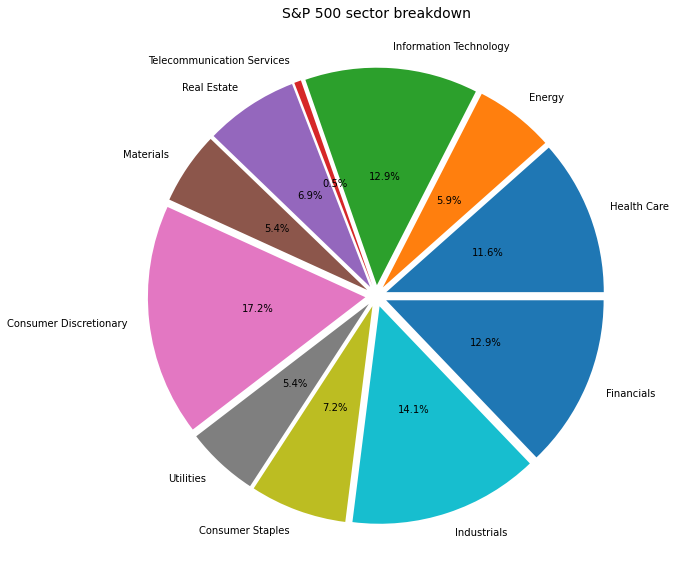

In [21]:
#find company volume for each Sector
#pie chart
#sparksql to pd
pie1_pd=pie1.toPandas()
type(pie1_pd)
sector_names = list(pie1_pd['Sector'])
sector_values = list(pie1_pd['count']) 

pie, ax = plt.subplots(figsize=[15,10])
plt.pie(x=sector_values, autopct="%.1f%%", explode=[0.05]*len(sector_values), labels=sector_names, pctdistance=0.5)
plt.title("S&P 500 sector breakdown", fontsize=14);
pie.savefig("DeliveryPieChart.png")

Relationships between `Price` and other numeric variables are of interest as well. The graph below plots `Price` as a function of `Earnings/Share`, colored by `Sector`. It appears that `Price` and `Earnings/Share` may have a weak/medium positive relationship, although the variance does not appear constant.  

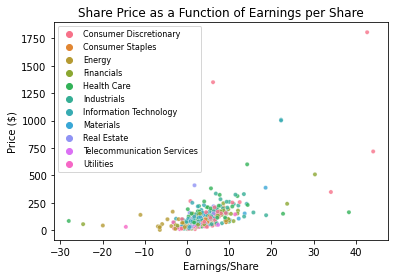

In [22]:
# price vs. earnings per share plot by sector
findata_pd=findata.toPandas()

findata_pd.Sector = findata_pd.Sector.astype('category')

plt.xlabel("Earnings/Share")
plt.ylabel("Price ($)")
plt.title("Share Price as a Function of Earnings per Share")

sns.scatterplot(x = "Earnings/Share", y = "Price", hue = "Sector", data = findata_pd,
               alpha = 0.8, s = 18)
    
plt.legend(loc = 'upper left', fontsize = 8)

Finally, we'll create a correlation matrix between the all numeric variables. This will assist us in determining which variables to include in our model. According to the matrix, `52_Week_Low` and `52_Week_High` are both strongly correlated with `Price`, but they are also highly correlated with each other. Therefore, we'll only choose one, `52_Week_Low`, to include in our models.  

In [23]:
# Correlation analysis of our new data frame
findata_pd.iloc[:,:].corr().style.background_gradient(cmap='Blues').format("{:.3f}")

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunication Services,Utilities
Price,1.000,0.195,-0.245,0.591,0.995,0.983,0.406,0.180,0.182,0.024,0.067,-0.048,-0.089,-0.043,0.079,0.038,0.046,-0.002,-0.030,-0.040,-0.088
Price/Earnings,0.195,1.000,-0.181,0.005,0.185,0.145,0.131,0.003,0.189,0.000,0.008,-0.019,0.087,-0.073,-0.012,-0.032,0.121,-0.024,-0.015,-0.026,-0.047
Dividend Yield,-0.245,-0.181,1.000,-0.077,-0.244,-0.208,-0.022,0.126,-0.078,0.089,-0.094,0.094,0.020,0.031,-0.236,-0.106,-0.174,-0.023,0.344,0.286,0.294
Earnings/Share,0.591,0.005,-0.077,1.000,0.589,0.605,0.194,0.181,-0.036,0.032,0.088,-0.004,-0.247,0.047,0.038,0.109,-0.045,0.047,-0.063,0.009,-0.074
52 Week Low,0.995,0.185,-0.244,0.589,1.000,0.985,0.399,0.176,0.189,0.023,0.070,-0.052,-0.084,-0.053,0.091,0.030,0.042,-0.007,-0.021,-0.040,-0.084
52 Week High,0.983,0.145,-0.208,0.605,0.985,1.000,0.376,0.180,0.174,0.018,0.053,-0.037,-0.087,-0.040,0.071,0.027,0.032,0.004,-0.002,-0.040,-0.071
Market Cap,0.406,0.131,-0.022,0.194,0.399,0.376,1.000,0.771,0.095,0.034,-0.055,0.036,-0.020,0.006,0.016,-0.058,0.209,-0.055,-0.089,0.087,-0.074
EBITDA,0.180,0.003,0.126,0.181,0.176,0.180,0.771,1.000,-0.037,0.036,-0.006,0.067,0.032,-0.177,0.004,-0.030,0.151,-0.044,-0.085,0.340,-0.004
Price/Sales,0.182,0.189,-0.078,-0.036,0.189,0.174,0.095,-0.037,1.000,0.012,-0.215,-0.083,-0.019,-0.067,0.095,-0.155,0.225,-0.070,0.461,-0.054,-0.097
Price/Book,0.024,0.000,0.089,0.032,0.023,0.018,0.034,0.036,0.012,1.000,0.075,0.130,-0.034,-0.034,-0.023,-0.021,-0.016,-0.025,-0.025,-0.009,-0.034


## The Machine Learning Process  

In this section, we explore three types of models to be fit to the data: Multiple Linear Regression, Random Forest, and Decision Tree. We use a pipeline to transform and assemble the data, performing the same transformations on the test set as the training set. The evaluation metric we use to compare the models is RMSE, obtained from running each model on the test set. Using this metric, we will declare the model that best predicts on the data.  

### Model 1: Multiple Linear Regression  

The Linear Regression technique attempts to model a response  y  by the predictors  xi . A simple linear regression model is of the general form $$Y_i = \beta_0 + \beta_1 x_i + E_i,$$  
but but multiple linear regression models can include terms that square the predictors or capture interactions between different predictors. A linear regression model is fit by minimizing the sum of squared residuals, that is, choosing  $\beta_0, \beta_1, ..., \beta_i$  that minimize the square of the observed - predicted values. It is called a 'linear' regression model not because the relationship between the response and predictors is linear, but because each  $\beta_i$  is of the first power.

Linear Regression models are easy to implement and simple to interpret. However, it's more difficult to include interaction terms in the model - they aren't chosen in an automated fashion. Also, highly correlated predictors in the same LR model increase variability in the estimated model parameters.  

First we must set up the transformer `sqlTrans`, which performs any necessary transformations on the variables (although this step does not execute the action... we will do that later). The transformations chosen are on the variables `Market_Cap` and `EBITDA`. We will take the square root of these variables before fitting the model since they have very high values, unlike the rest of the data. We are also only working with numeric variables.  

In [26]:
#stock price prediction 
sqlTrans = SQLTransformer(
    statement =  "Select Dividend_Yield, sqrt(Market_Cap) as r_marketcap, sqrt(EBITDA) as r_ebitda, Price_Sales, Price_Book, 52_Week_Low, Price as label FROM __THIS__;"
)

In [27]:
sqlTrans.transform(train).show(5)

+--------------+------------------+------------------+-----------+----------+-----------+------+
|Dividend_Yield|       r_marketcap|          r_ebitda|Price_Sales|Price_Book|52_Week_Low| label|
+--------------+------------------+------------------+-----------+----------+-----------+------+
|     0.8756979|148272.07059321724| 33075.67081708246|   6.493563|      4.56|       75.0| 65.05|
|     0.7782101| 156827.4604525623| 75901.25163658371| 0.58022565|      6.03|      59.08|  48.6|
|     1.5795412| 899726.6251478834| 281755.2129065228|  3.4586093|      5.66|      180.1|155.15|
|     2.4995599| 425894.3530971032| 101538.1701627521|   6.291571|     26.14|     125.86|108.48|
|     1.6132456| 143484.1597563996|31494.189940368367| 0.17396984|      9.73|     106.27| 91.55|
+--------------+------------------+------------------+-----------+----------+-----------+------+
only showing top 5 rows



Next, we'll create the `assembler` to assemble the desired predictor variables and load them into a column called `features`.  

In [28]:
#put 6 predictors into feature
assembler = VectorAssembler(inputCols = ["Dividend_Yield", "r_marketcap", "r_ebitda", "Price_Sales", "Price_Book", "52_Week_Low"], outputCol = "features", handleInvalid = 'keep')


Below is the `pipeline` that that the data - first the training set and then the test set - will go through to be fit and evaluated. First transformation, then assembly, then the linear regression model.  

In [29]:
# Use CV to tune the parameter

CVTrainModel1 = LinearRegression()
pipeline = Pipeline(stages = [sqlTrans, assembler, CVTrainModel1])

Lastly, we'll define our grid of possible parameters to try when we perform Cross Validation, as well as define RMSE as our metric of choice for evaluation.  

In [30]:
#Grid the parameter
paramGrid = ParamGridBuilder() \
    .addGrid(CVTrainModel1.regParam, [0, 0.01, 0.05]) \
    .addGrid(CVTrainModel1.fitIntercept, [False, True]) \
    .addGrid(CVTrainModel1.elasticNetParam, [0, 0.05, 0.1]) \
    .build()

In [31]:
# Use CV to evaluate the RMSE to find min RMSE ( find the best model from 18 models)
crossval = CrossValidator(estimator = pipeline,
                          estimatorParamMaps = paramGrid,
                          evaluator = RegressionEvaluator(metricName='rmse'),
                          numFolds=5)

In [ ]:
# put training set to fit the model
CVModel = crossval.fit(train)

The performance metrics for the the parameters chosen are shown in the output below.  

In [ ]:
# 18 models output
list(zip(CVModel.avgMetrics, paramGrid))

Using the trained model from above, we can now feed the test set through our pipeline and cross validation. The prediction results are displayed below.  

In [ ]:
# use the best model to predict
prediction=CVModel.transform(test)

In [ ]:
prediction.show()

Now we can obtain the RMSE for the model on the test set, which we will compare with the other models.  

In [ ]:
test_error = RegressionEvaluator().evaluate(prediction)
print(test_error)

### Model 2: Random Forest  

The Random Forest method for fitting a model is similar to the Bagged Tree method. Like the Bagged Tree method, multiple bootstrap samples are taken from the original sample, and a tree is created from each sample. However, the Random Forest method creates the tree using  m  randomly chosen predictors for each sample instead of all predictors every time. This increases independence between trees, leading to a reduction in variance when the results are averaged. This is especially important when there exists an especially strong predictor in the data set.  

Multiple trees are created, increasing precision of estimates. Trees are less correlated, reducing variance. Provides ability to examine variable importance measures. However, Random Forest models have very low interpretability. They are more valuable for prediction purposes. These models can also require a lot of computing power to create.  

Similar to the last model, we are setting up an assembler for the Random Forest Model. We will call this `rf_assembler`.  

In [42]:
#Random forest
rf_assembler = VectorAssembler(inputCols = [ "Dividend_Yield", "r_marketcap", "r_ebitda", "Price_Sales", "Price_Book", "52_Week_Low"], outputCol = "features")

Below, we also set up the pipeline for the Random Forest model.

In [43]:
# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="features")

In [44]:
pipeline = Pipeline(stages=[rf_assembler, rf])

In [45]:
rf_train= rf_assembler.transform(sqlTrans.transform(train)).select("Dividend_Yield", "r_marketcap", "r_ebitda", "Price_Sales", "Price_Book","52_Week_Low","label")

In [46]:
rf_train.show(5)
model = pipeline.fit(rf_train)

+--------------+---------------+---------+-----------+----------+-----------+------+
|Dividend_Yield|     Market_Cap|   EBITDA|Price_Sales|Price_Book|52_Week_Low| label|
+--------------+---------------+---------+-----------+----------+-----------+------+
|     0.8756979|2.1984606918E10|  1.094E9|   6.493563|      4.56|       75.0| 65.05|
|     0.7782101|2.4594852352E10|  5.761E9| 0.58022565|      6.03|      59.08|  48.6|
|     1.5795412|     8.09508E11|7.9386E10|  3.4586093|      5.66|      180.1|155.15|
|     2.4995599|     1.81386E11| 1.031E10|   6.291571|     26.14|     125.86|108.48|
|     1.6132456|2.0587704101E10|9.91884E8| 0.17396984|      9.73|     106.27| 91.55|
+--------------+---------------+---------+-----------+----------+-----------+------+
only showing top 5 rows



In [47]:
# Make predictions.
rf_test= rf_assembler.transform(sqlTrans.transform(test)).select("Dividend_Yield", "r_marketcap", "r_ebitda", "Price_Sales", "Price_Book","52_Week_Low","label")
predictions = model.transform(rf_test)

In [48]:
# Select (prediction, true label) and compute test error
evaluator=RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = RegressionEvaluator().evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
predictions.show()

Root Mean Squared Error (RMSE) on test data = 124.179
+--------------+---------------+---------+-----------+----------+-----------+-------+--------------------+------------------+
|Dividend_Yield|     Market_Cap|   EBITDA|Price_Sales|Price_Book|52_Week_Low|  label|            features|        prediction|
+--------------+---------------+---------+-----------+----------+-----------+-------+--------------------+------------------+
|    0.21832074|  8.123611867E9|8.53941E8|  1.1301061|      2.51|     169.55| 109.63|[0.21832074,8.123...|144.35811138934977|
|     1.9089824|     1.02121E11|  5.744E9|  3.7404804|      3.19|       64.6|  56.27|[1.9089824,1.0212...| 64.26890986285981|
|     2.2190912|5.0337702249E10| 2.7674E9|  4.0483294|     12.86|     125.24| 108.25|[2.2190912,5.0337...|105.85537583994082|
|     0.9240122|1.3632608582E10| 2.1432E9|  1.7282298|      8.28|     278.33|  240.6|[0.9240122,1.3632...|237.51505988562093|
|           0.0|2.4348294504E10| -3.781E8|   16.50682|    224.13

### Model 3: Regression Tree  

The Regression Tree method splits up the predictor space into regions, producing different predictions for each region. Usually, the mean of the observations within a given region is the prediction. The splits are chosen by using Recursive Binary Splitting. That is, for every possible value of each predictor, the Residual Sum of Squares is minimized. After the first split is chosen, the same process is repeated to create many splits, which are then 'pruned' back. The number of nodes created by splits is generally chosen using Cross-Validation. Pruning prevents overfitting and increases bias while decreasing variance, ultimately leading to a better prediction.  

Trees are simple to understand and interpret, predictors don't need to be scaled, no statistical assumptions are required, and variables are selected automatically. However, small changes in data can vastly change the tree, there is no optimal algorithm, and pruning is usually needed.  

In [51]:
#df
dt_assembler = VectorAssembler(inputCols = [ "Dividend_Yield", "Market_Cap", "EBITDA", "Price_Sales", "Price_Book", "52_Week_Low"], outputCol = "features")
# Train a RandomForest model.
dt = DecisionTreeRegressor(featuresCol="features")
pipeline = Pipeline(stages=[dt_assembler, dt])
dt_train= dt_assembler.transform(sqlTrans.transform(train)).select("Dividend_Yield", "Market_Cap", "EBITDA", "Price_Sales", "Price_Book","52_Week_Low","label")
model = pipeline.fit(dt_train)
# Make predictions.
dt_test= dt_assembler.transform(sqlTrans.transform(test)).select("Dividend_Yield", "Market_Cap", "EBITDA", "Price_Sales", "Price_Book","52_Week_Low","label")
predictions = model.transform(dt_test)
# Select (prediction, true label) and compute test error
evaluator=RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = RegressionEvaluator().evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
predictions.show()

Root Mean Squared Error (RMSE) on test data = 117.477
+--------------+---------------+---------+-----------+----------+-----------+-------+--------------------+------------------+
|Dividend_Yield|     Market_Cap|   EBITDA|Price_Sales|Price_Book|52_Week_Low|  label|            features|        prediction|
+--------------+---------------+---------+-----------+----------+-----------+-------+--------------------+------------------+
|    0.21832074|  8.123611867E9|8.53941E8|  1.1301061|      2.51|     169.55| 109.63|[0.21832074,8.123...|137.32000000000002|
|     1.9089824|     1.02121E11|  5.744E9|  3.7404804|      3.19|       64.6|  56.27|[1.9089824,1.0212...| 54.09708333333333|
|     2.2190912|5.0337702249E10| 2.7674E9|  4.0483294|     12.86|     125.24| 108.25|[2.2190912,5.0337...| 110.8320833333333|
|     0.9240122|1.3632608582E10| 2.1432E9|  1.7282298|      8.28|     278.33|  240.6|[0.9240122,1.3632...|220.75000000000003|
|           0.0|2.4348294504E10| -3.781E8|   16.50682|    224.13

log_predictions = log_lrModel.transform(test)